In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [13]:
df = pd.read_csv("data/diabetes.csv")

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


array([[<AxesSubplot: title={'center': 'Pregnancies'}>,
        <AxesSubplot: title={'center': 'Glucose'}>,
        <AxesSubplot: title={'center': 'BloodPressure'}>],
       [<AxesSubplot: title={'center': 'SkinThickness'}>,
        <AxesSubplot: title={'center': 'Insulin'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'DiabetesPedigreeFunction'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Outcome'}>]], dtype=object)

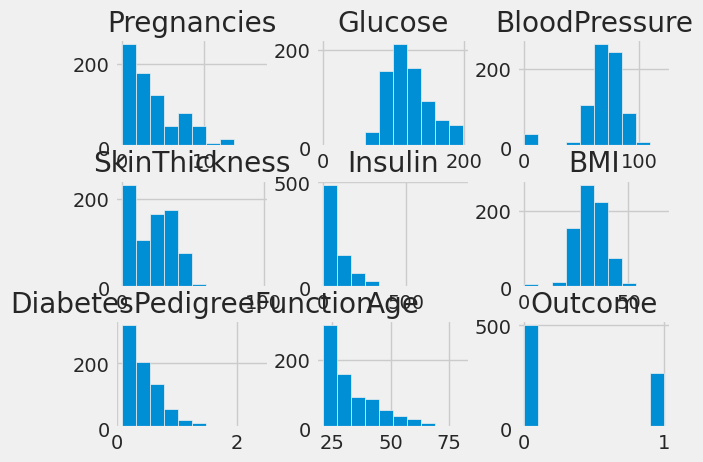

In [20]:
df.hist(bins=10)

[Text(0.5, 1.0, 'Box Plot of Scores')]

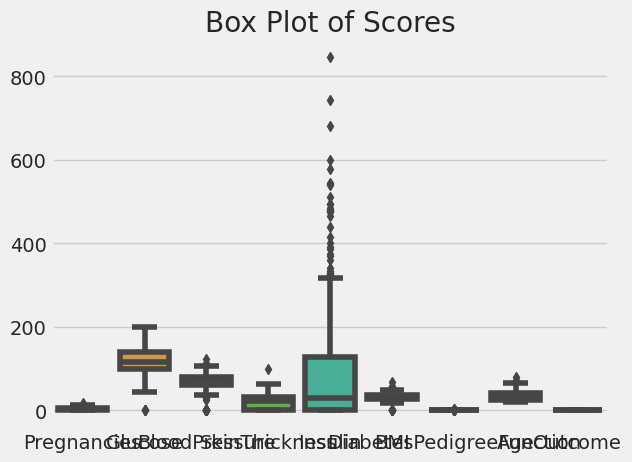

In [21]:
sns.boxplot(data=df).set(title="Box Plot of Scores")

# Outliers Detect

***We can consider it for the age column***

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc483a9ae00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc483a9b340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc483a9ab60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc483a9b760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc483a9ba00>],
 'means': []}

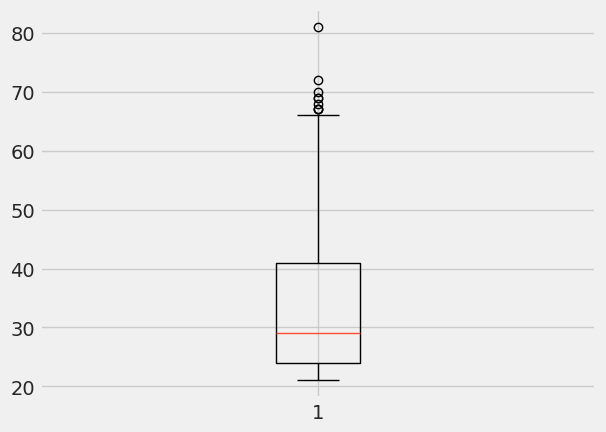

In [25]:
plt.boxplot(df['Age'])

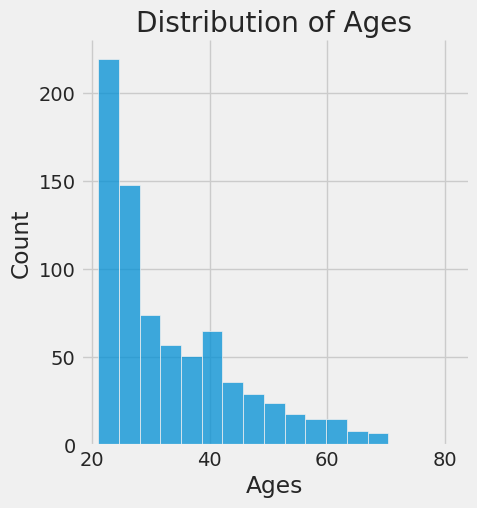

In [26]:
sns.displot(data=df['Age']).set(title="Distribution of Ages", xlabel="Ages")

***Using Standard Deviation***

In [36]:
df_age = pd.DataFrame(df['Age'],columns=['Age'])
df_age

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [37]:
df_age.mean()

Age    33.240885
dtype: float64

In [38]:
df_age.std()

Age    11.760232
dtype: float64

In [39]:
lower_limit = df_age.mean() - 3*df_age.std()
upper_limit = df_age.mean() + 3*df_age.std()
print(lower_limit)
print(upper_limit)

Age   -2.039809
dtype: float64
Age    68.52158
dtype: float64


In [43]:
df_age_filtered = df_age[(df_age['Age'] > lower_limit.item()) & (df_age['Age'] < upper_limit.item())]
print(df_age_filtered)

     Age
0     50
1     31
2     32
3     21
4     33
..   ...
763   63
764   27
765   30
766   47
767   23

[763 rows x 1 columns]


***Using the Z-Score***

In [45]:
df_age['z_score']=(df_age['Age'] - df_age['Age'].mean())/df_age['Age'].std()
df_age.head()

,Age,z_score
0,1.425067,1.425067
1,-0.190548,-0.190548
2,-0.105515,-0.105515
3,-1.040871,-1.040871
4,-0.020483,-0.020483


In [47]:
df_age_filtered= df_age[(df_age['z_score']>-3) & (df_age['z_score']<3)]

print(df_age_filtered)

          Age   z_score
0    1.425067  1.425067
1   -0.190548 -0.190548
2   -0.105515 -0.105515
3   -1.040871 -1.040871
4   -0.020483 -0.020483
..        ...       ...
763  2.530487  2.530487
764 -0.530677 -0.530677
765 -0.275580 -0.275580
766  1.169970  1.169970
767 -0.870806 -0.870806

[763 rows x 2 columns]


***Using the Interquartile Range (IQR)***

In [49]:
IQR = 41-24
lower_limit = 24 - 1.5*IQR
upper_limit = 41 + 1.5*IQR
print(upper_limit)
print(lower_limit)

66.5
-1.5


In [51]:
df_age_filtered = df_age[(df_age['Age']>lower_limit) & (df_age['Age']<upper_limit)]
print(df_age_filtered)

          Age   z_score
0    1.425067  1.425067
1   -0.190548 -0.190548
2   -0.105515 -0.105515
3   -1.040871 -1.040871
4   -0.020483 -0.020483
..        ...       ...
763  2.530487  2.530487
764 -0.530677 -0.530677
765 -0.275580 -0.275580
766  1.169970  1.169970
767 -0.870806 -0.870806

[768 rows x 2 columns]


In [53]:
q25,q75 = np.percentile(a = df_age,q=[25,75])
IQR = q75 - q25
print(IQR)

1.4455497701041802


***Using Percentile***

In [56]:
# lower_limit, upper_limit = np.percentile(a=df_age,q=[0.5,99.5])
# print(upper_limit)
# print(lower_limit)
# df_age_filtered = df_age[(df_age['Age']>lower_limit) & (df_age['Age']<upper_limit)]
# print(df_age_filtered)


# Separate categorical and continuous variables

In [61]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [62]:
categorical_val

['Outcome']

In [63]:
continous_val

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# Data Pre-Processing

In [64]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [65]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [66]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [70]:
# handel the missng value
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing zeros : 0
Glucose ==> Missing zeros : 0
BloodPressure ==> Missing zeros : 0
SkinThickness ==> Missing zeros : 0
Insulin ==> Missing zeros : 0
BMI ==> Missing zeros : 0
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


# Train the model 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df[feature_columns]
y = df.Outcome

In [74]:
print(len(X))

768


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
print(len(X_train))
print(len(X_test))

537
231


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [87]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [88]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=dtc, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

/home/kazi/.local/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1500,
                  random_state=42)

In [90]:
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832168   0.636364  0.757576    0.734266      0.764357
recall       0.788079   0.700000  0.757576    0.744040      0.757576
f1-score     0.809524   0.666667  0.757576    0.738095      0.760049
support    151.000000  80.000000  0.757576  231.000000    231.000000


In [91]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576}}

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809211   0.645570  0.753247    0.727390      0.752538
recall       0.814570   0.637500  0.753247    0.726035      0.753247
f1-score     0.811881   0.641509  0.753247    0.726695      0.752878
support    151.000000  80.000000  0.753247  231.000000    231.000000


In [94]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576},
 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533}}

In [95]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    349.0  188.0       1.0      537.0         537.0
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
TESTING RESULTS: 
CONFUSION MATRIX:
[[124  27]
 [ 25  55]]
ACCURACY SCORE:
0.7749
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.832215   0.670732  0.774892    0.751473      0.776290
recall       0.821192   0.687500  0.774892    0.754346      0.774892
f1-score     0.826667   0.679012  0.774892    0.752840      0.775531
support    151.000000  80.000000  0.774892  231.000000    231.000000


In [98]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576},
 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7748917748917749}}

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.858726    0.778409  0.832402    0.818567      0.830607
recall       0.888252    0.728723  0.832402    0.808488      0.832402
f1-score     0.873239    0.752747  0.832402    0.812993      0.831056
support    349.000000  188.000000  0.832402  537.000000    537.000000
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.820000   0.654321  0.761905    0.737160      0.762622
recall       0.814570   0.662500  0.761905    0.738535      0.761905
f1-score     0.817276   0.658385  0.761905    0.737830      0.762249
support    151.000000  80.000000  0.761905  231.000000    231.000000


In [101]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576},
 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7748917748917749},
 'AdaBoost': {'Train': 0.8324022346368715, 'Test': 0.7619047619047619}}

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.947368    0.960227  0.951583    0.953798      0.951870
recall       0.979943    0.898936  0.951583    0.939439      0.951583
f1-score     0.963380    0.928571  0.951583    0.945976      0.951194
support    349.000000  188.000000  0.951583  537.000000    537.000000
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.816901   0.606742  0.735931    0.711821      0.744119
recall       0.768212   0.675000  0.735931    0.721606      0.735931
f1-score     0.791809   0.639053  0.735931    0.715431      0.738906
support    151.000000  80.000000  0.735931  231.000000    231.000000


In [103]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576},
 'Random Forest': {'Train': 1.0, 'Test': 0.7532467532467533},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7748917748917749},
 'AdaBoost': {'Train': 0.8324022346368715, 'Test': 0.7619047619047619},
 'Gradient Boosting': {'Train': 0.9515828677839852,
  'Test': 0.7359307359307359}}

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.799511    0.828125  0.806331    0.813818      0.809529
recall       0.936963    0.563830  0.806331    0.750396      0.806331
f1-score     0.862797    0.670886  0.806331    0.766841      0.795610
support    349.000000  188.000000  0.806331  537.000000    537.000000
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 37  43]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.778443   0.671875  0.748918    0.725159      0.741536
recall       0.860927   0.537500  0.748918    0.699214      0.748918
f1-score     0.817610   0.597222  0.748918    0.707416      0.741285
support    151.000000  80.000000  0.748918  231.000000    231.000000
